# **CSCE 5218 / CSCE 4930 Deep Learning**

# **The Perceptron** (20 pt)


## NAME: Harshavardhan Sasikumar [11800735]

In [1]:
!curl -o test.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/test_small.txt
!curl -o train.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/train.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   136  100   136    0     0   1235      0 --:--:-- --:--:-- --:--:--  1283
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 11645  100 11645    0     0   117k      0 --:--:-- --:--:-- --:--:--  122k


In [2]:
# Read and print first 10 lines of the file
with open("train.dat", "r") as f:
    for _ in range(10):
        print(f.readline().strip())

with open("test.dat", "r") as f:
    for _ in range(10):
        print(f.readline().strip())

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0
0	1	0	0	0	0	0	1	1	1	1	1	1	0
0	1	1	1	0	0	0	1	0	1	1	0	1	1
0	1	1	0	0	0	1	0	0	0	0	0	1	0
0	0	0	1	1	0	1	1	1	0	0	0	1	0
0	0	0	0	0	0	1	0	1	0	1	0	1	0
X1	X2	X3
1	1	1	1
0	0	1	1
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
1	1	1	1


### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this. 

In [3]:
import math
import itertools
import re


# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
    return data


def dot_product(array1, array2):
    #TODO: Return dot product of array 1 and array 2
    return sum(a * b for a, b in zip(array1, array2))


def sigmoid(x):
    #TODO: Return outpout of sigmoid function on x
    return 1 / (1 + math.exp(-x))

# The output of the model, which for the perceptron is 
# the sigmoid function applied to the dot product of 
# the instance and the weights
def output(weight, instance):
    #TODO: return the output of the model 
    return sigmoid(dot_product(weights, instance))

# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    #TODO: return the prediction of the model
    return 1 if output(weights, instance) >= 0.5 else 0


# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0 for instance in instances])
    return correct * 100 / len(instances)


# Train a perceptron with instances and hyperparameters:
#       lr (learning rate) 
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs):
    weights = [0] * (len(instances[0])-1)
    for _ in range(epochs):  
        for instance in instances:
            in_value = dot_product(weights, instance)
            output = sigmoid(in_value)
            error = instance[-1] - output
            for i in range(len(weights)):
                weights[i] += lr * error * output * (1 - output) * instance[i]
    return weights

## Run it

In [4]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4


## Questions

Answer the following questions. Include your implementation and the output for each question.

### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)
A) 
 - In the function train_perceptron(), the weight update step is based on gradient descent, so it is necessary to have sigmoid function to compute the gradient correctly.
  
- The Loss is no longer differentiable.
  
- The loss function of a perceptron is non-differentiable due to the predict(weights, instance) function returning discrete values (0 or 1). Since the perceptron model learns via gradient descent, a function that can be differentiated is required, such as the sigmoid function.

-  As gradient descent is performed, it also reveals the need for weight adjustment which the sigmoid activation helps with. This function enables changes to be made in a stepwise fashion, based on the set probability values rather than directly moving between set integers.

-  Using predict() without any alteration would make learning jump discontinuously, making it impossible for the model to converge easily.





### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above) 


In [5]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate

for lr in lr_array:
  for tr_size in tr_percent:
    for epochs in num_epochs:
      size =  round(len(instances_tr)*tr_size/100)
      pre_instances = instances_tr[0:size]
      weights = train_perceptron(pre_instances, lr, epochs)
      accuracy = get_accuracy(weights, instances_te)
    print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
            f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 20, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 85.7
#tr: 40, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 100, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 200, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 85.7
#tr: 300, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 85.7
#tr: 400, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 20, epochs: 100, learning rate: 0.010; Accuracy (test, 14 instances): 42.9
#tr: 40, epochs: 100, learning rate: 0.010; Accuracy (test, 14 instances): 85.7
#tr: 100, epochs: 100, learning rate: 0.010; Accuracy (test, 14 instances): 28.6
#tr: 200, epochs: 100, learning rate: 0.010; Accuracy (test, 14 instances): 85.7
#tr: 300, epochs: 100, learning rate: 0.010; Accuracy (test, 14 instances): 85.7
#tr: 400, epochs: 100, learning rate: 0.010; Accuracy (test, 14 instances): 71.4
#tr: 20, epochs: 100, learning r

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?
```
#### TODO: Add your answer here (code and text)

### Answers:

My first observation was that the model was able to achieve reasonable accuracy without having to be trained on the entire dataset. An example of this is the model achieving 85.7% accuracy, which is the highest in the experiments, while training with 200 or 300 examples and a learning rate of 0.005. On the other hand, when using all 400 examples, the model only achieves 71.4%. This suggests that some models can be trained on only a subset of data and perform better because it is less prone to overfitting or is easier for the model to learn.

In terms of results achieved, it is observed that the best result comes from a lower learning rate when set at 0.005. On the other hand, raising it to a 0.050 learning rate alongside a higher number of epochs leads to some of the most poorly achieved results. These results can be attributed to the fact that a higher learning rate applies more aggressive updates to the weights that end up overshooting the optimal working values when trained for too long on too many examples. 


A)  No, utilizing the complete training dataset does not always equate to higher accuracy. The results suggest that training with only a fraction of the provided data, say 200 or 300 samples, produced results equal to or better than the full dataset’s performance. For instance, training on 200 or 300 samples at a learning rate of 0.005 yields an accuracy score of 85.7. This value was higher than the score of 71.4 that was received from using all 400 training samples. Thus, it appears that increasing the amount of training data does not necessarily enhance a perceptron’s generalization ability; instead, the model may overfit or underfit the data depending on the learning rate and number of epochs trained.

B) The second run had more training data at their disposal. However, it will take longer to reach convergence. The second model had a learning rate of 0.005 whereas the first model had 0.05, meaning the second run will take longer to learn. If the local minima is set too early and the learning rate is too low, then the model will not escape. In addition, 20 epochs might not be enough for the model to escape these local minima with a lower learning rate. Firstly, a learning rate of 0.05 gives an advantage having lesser epochs towards model convergence. It is clear that more data never necessarily results in higher accuracy if the learning rate is not adjusted.

C) Tweaking hyperparameters such as the learning rate and number of epochs along with the application of other strategies like momentum, adaptive learning rates such as Adam, or batch normalization can improve the accuracy past 85.7. These results suggest that some combinations of training size and learning rate such as training sizes of 200-300 examples at a 0.005 learning rate yield results of 85.7 accuracy. It may also be beneficial to increase the number of epochs and optimize the learning rate towards 80.0 accuracy and beyond. 

D) This is not always true. With an increased number of epochs, models tend to overfit, where the model collects noise from the training dataset rather than learning general rules. For instance, by training with 100 epochs does not improve accuracy past 85.7. If the learning rate is too high, extended training can cause weight updates to oscillate, which ultimately results in convergence. On the other hand, if the learning rate is too slow, even 100 epochs may not grant a sufficient amount of improvement. This is why, for effective training, an appropriate amount of training epochs (100+) should be combined with an effective learning rate and overfitting regularization techniques.

### Plot interpreting the results with all the combinations of hyperparameters

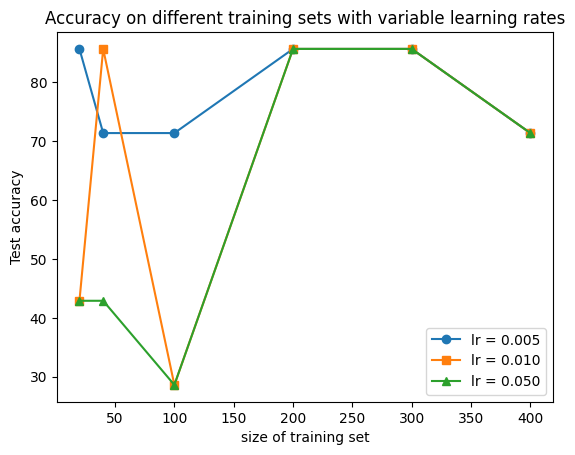

In [6]:
import matplotlib.pyplot as plt

training_sizes = [20, 40, 100, 200, 300, 400]
accuracy_005 = [85.7, 71.4, 71.4, 85.7, 85.7, 71.4]
accuracy_010 = [42.9, 85.7, 28.6, 85.7, 85.7, 71.4]
accuracy_050 = [42.9, 42.9, 28.6, 85.7, 85.7, 71.4]

plt.plot(training_sizes, accuracy_005, marker='o', label="lr = 0.005")
plt.plot(training_sizes, accuracy_010, marker='s', label="lr = 0.010")
plt.plot(training_sizes, accuracy_050, marker='^', label="lr = 0.050")

plt.xlabel("size of training set")
plt.ylabel("Test accuracy")
plt.title("Accuracy on different training sets with variable learning rates")
plt.legend()
plt.show()
